### **Let's Begin:**

**Lets start by importing the required libraries.**

In [1]:
# Basic python libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries.
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Activation
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers

print('Above libraries have been imported.')

Above libraries have been imported.


**Seperate the Training and Validation Data.**

In [2]:
# Define the train and validataion data paths.
train_dir = '../input/fer2013/train'
val_dir = '../input/fer2013/test'

print('Data directories have been initialised.')

Data directories have been initialised.


**Have a look at our data.**

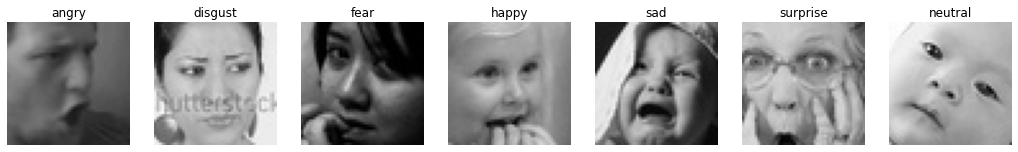

In [3]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Perform some Data Augmentation on train and validations sets.**

In [37]:
batch_size = 48

datagen_train = ImageDataGenerator(rescale = 1./255,
#                                    validation_split = 0.2
                                  )

datagen_val = ImageDataGenerator(rescale = 1./255,
#                                  validation_split = 0.2
                                 )

print('Above data generator functions have been created.')

Above data generator functions have been created.


In [38]:
"""
Now apply the data augmentation to the images.
"""
# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True,
#                                               subset = "training"
                                              )

# Validation data.
val_set = datagen_train.flow_from_directory(directory=val_dir,
                                            target_size=(img_size,img_size),
                                            batch_size = batch_size,
                                            color_mode = 'grayscale',
                                            class_mode = "categorical",
                                            shuffle=False,
#                                             subset = "validation"
                                            )

print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


**Now lets create our custom CNN model.**

In [42]:
# First layer
model= tf.keras.models.Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(128,(5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer   
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# # Fourth layer
# model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Fifth layer
# model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

# First fully connected layer
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Second fully connected layer  
model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# # Third fully connected layer
# model.add(Dense(128,activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


In [43]:
# Get model summary.
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_64 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_65 (Batc (None, 24, 24, 128)      

In [44]:
history = model.fit_generator(generator = train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              validation_data = val_set,
                              validation_steps=val_set.n//val_set.batch_size,
                              # callbacks=callback_list,
                              epochs = 20)

print('Your model has been trained!!')

Epoch 1/20
598/598 [==============================] - 37s 60ms/step - loss: 2.1667 - accuracy: 0.2900 - val_loss: 1.9299 - val_accuracy: 0.2457
Epoch 2/20
598/598 [==============================] - 36s 60ms/step - loss: 1.6160 - accuracy: 0.4192 - val_loss: 1.5203 - val_accuracy: 0.4509
Epoch 3/20
598/598 [==============================] - 35s 59ms/step - loss: 1.4635 - accuracy: 0.4887 - val_loss: 1.5495 - val_accuracy: 0.4522
Epoch 4/20
598/598 [==============================] - 35s 59ms/step - loss: 1.3905 - accuracy: 0.5211 - val_loss: 1.3503 - val_accuracy: 0.5352
Epoch 5/20
598/598 [==============================] - 36s 60ms/step - loss: 1.3420 - accuracy: 0.5423 - val_loss: 1.4805 - val_accuracy: 0.5025
Epoch 6/20
598/598 [==============================] - 35s 59ms/step - loss: 1.2922 - accuracy: 0.5618 - val_loss: 1.2814 - val_accuracy: 0.5582
Epoch 7/20
598/598 [==============================] - 36s 60ms/step - loss: 1.2640 - accuracy: 0.5758 - val_loss: 1.2685 - val_accuracy:

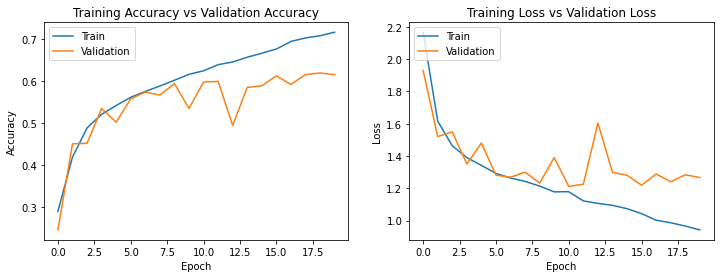

In [45]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [46]:
from keras.preprocessing import image

(48, 48)


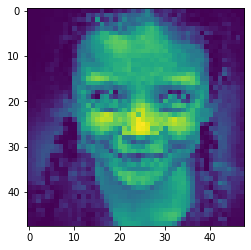

In [53]:
img = image.load_img("../input/testsub/test_sub.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [48]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [54]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[4.5668724e-24, 0.0, 7.952547e-26, 1.0, 2.9853545e-32, 0.0, 7.3218353e-28]


In [55]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [56]:
model.save('model_21.h5')